# Hello Linear Classifier with TensorFlow only

In [1]:
# Prerequisites
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Generate 2 classes of points on a 2D plane

In [2]:
nr_samples = 1024
samples_negative = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=nr_samples)
samples_positive = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=nr_samples)

Stack the classes to single matrix

In [3]:
inputs = np.vstack((samples_negative, samples_positive)).astype(np.float32)
inputs.shape

(2048, 2)

Generate binary targets

In [4]:
targets = np.vstack((np.zeros((nr_samples, 1), dtype="float32"),
                     np.ones((nr_samples, 1), dtype="float32")))
targets.shape

(2048, 1)

Plot the 2D Data

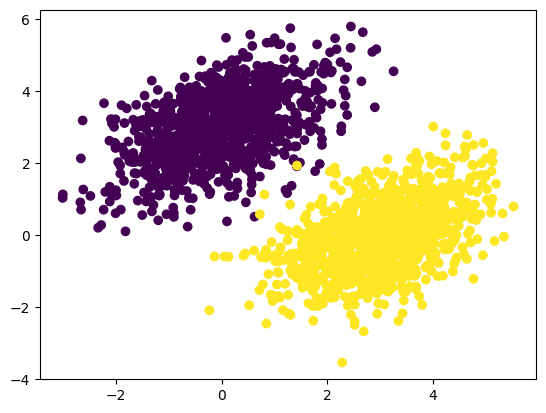

In [5]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

### Create Linear Classifier

Create linear classifier ```prediction = W * sample + b``` and train to minimize the MSE

Create variables ```W``` and ```b```

In [6]:
dim_input = 2
dim_output = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(dim_input, dim_output)))
b = tf.Variable(initial_value=tf.zeros(shape=(dim_output,)))

Forward Pass Function

In [7]:
def model(inputs):
    return tf.matmul(inputs, W) + b

Loss Function (MSE)

In [8]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)   # Average into a single scalar loss

Training Step,  to keep it simple, do batch learning

In [9]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        # Forward pass
        predictions = model(inputs)
        loss = square_loss(predictions, targets)

    # Retrieve Gradients
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    # Update parameters
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)

    return loss

The batch training loop

In [10]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 6.1754
Loss at step 1: 0.6839
Loss at step 2: 0.2136
Loss at step 3: 0.1596
Loss at step 4: 0.1444
Loss at step 5: 0.1337
Loss at step 6: 0.1242
Loss at step 7: 0.1156
Loss at step 8: 0.1077
Loss at step 9: 0.1005
Loss at step 10: 0.0939
Loss at step 11: 0.0879
Loss at step 12: 0.0824
Loss at step 13: 0.0774
Loss at step 14: 0.0728
Loss at step 15: 0.0686
Loss at step 16: 0.0648
Loss at step 17: 0.0613
Loss at step 18: 0.0581
Loss at step 19: 0.0552
Loss at step 20: 0.0526
Loss at step 21: 0.0501
Loss at step 22: 0.0479
Loss at step 23: 0.0459
Loss at step 24: 0.0440
Loss at step 25: 0.0424
Loss at step 26: 0.0408
Loss at step 27: 0.0394
Loss at step 28: 0.0381
Loss at step 29: 0.0369
Loss at step 30: 0.0359
Loss at step 31: 0.0349
Loss at step 32: 0.0340
Loss at step 33: 0.0332
Loss at step 34: 0.0324
Loss at step 35: 0.0318
Loss at step 36: 0.0311
Loss at step 37: 0.0306
Loss at step 38: 0.0300
Loss at step 39: 0.0296


Plot Predictions

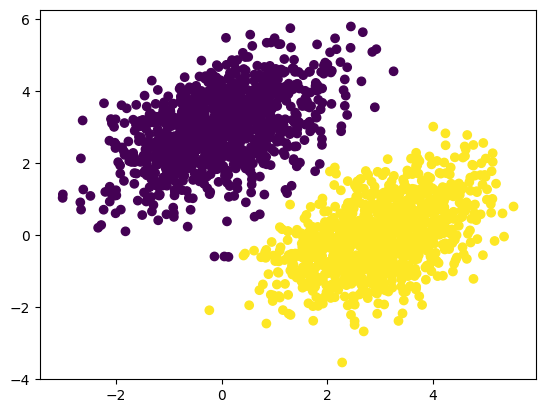

In [12]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

Plot decision boundary line

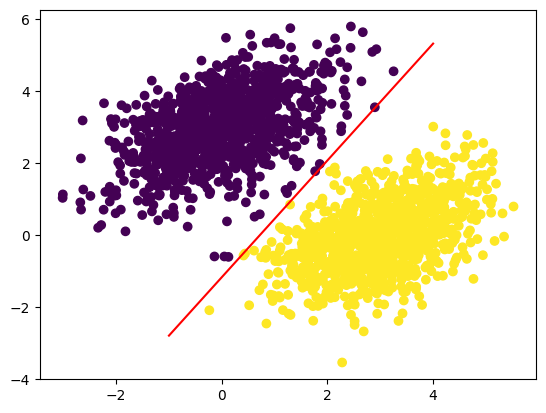

In [14]:
x = np.linspace(-1, 4, 100)
y = -W[0]/W[1] * x + (0.5-b)/W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)